In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "C:/Users/sanke/OneDrive/Desktop/The Stray help/Lumpy Skin Images Dataset/Train"
val_dir = "C:/Users/sanke/OneDrive/Desktop/The Stray help/Lumpy Skin Images Dataset/Test"

# Data Augmentation and Loading
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=8, class_mode='binary', subset='training'
)

val_data = datagen.flow_from_directory(
    val_dir, target_size=(224, 224), batch_size=8, class_mode='binary', subset='validation'
)


Found 672 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


# Freeze Layers
for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [10]:
for layer in base_model.layers[:100]:  # Freeze first 140 layers
    layer.trainable = False


In [5]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


In [7]:
import tensorflow.keras.backend as K
import gc
K.clear_session()
gc.collect()


0

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=15)


Epoch 1/15


c:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 771ms/step - accuracy: 0.6716 - loss: 3.4209 - val_accuracy: 0.6667 - val_loss: 0.6375
Epoch 2/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 688ms/step - accuracy: 0.6944 - loss: 0.6230 - val_accuracy: 0.6667 - val_loss: 0.6425
Epoch 3/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 690ms/step - accuracy: 0.7025 - loss: 0.6201 - val_accuracy: 0.6667 - val_loss: 0.6366
Epoch 4/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 642ms/step - accuracy: 0.7071 - loss: 0.6134 - val_accuracy: 0.6667 - val_loss: 0.6381
Epoch 5/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 710ms/step - accuracy: 0.6856 - loss: 0.6290 - val_accuracy: 0.6667 - val_loss: 0.6380
Epoch 6/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 691ms/step - accuracy: 0.7320 - loss: 0.5877 - val_accuracy: 0.6667 - val_loss: 0.6539
Epoch 7/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 689ms/step - accuracy: 0.6958 - loss: 0.6397 - val_accuracy: 0.6667 - val_loss: 0.6375
Epoch 8/15
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 680ms/step - accuracy: 0.6776 - loss: 0.6326 - val_accuracy: 0.666

In [18]:
model.save("lumpy_detector.h5")

# Load and Test
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = "lumpy cow.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Lumpy Disease Detected" if prediction > 0.5 else "Normal Animal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Lumpy Disease Detected


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


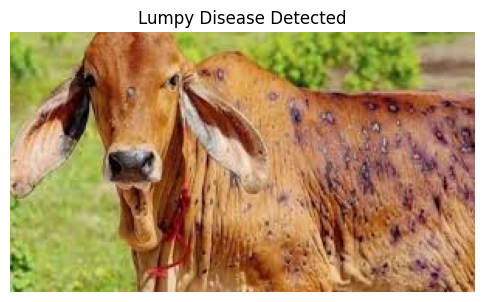

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("lumpy_detector.h5")

# Load image
img_path = "lumpy cow.jpeg"
img = image.load_img(img_path, target_size=(224, 224))  
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)[0][0]  # Get scalar value

# Determine Label
label = "Lumpy Disease Detected" if prediction > 0.5 else "Normal Animal"

# Load original image with OpenCV
orig_img = cv2.imread(img_path)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Add label on image
font = cv2.FONT_HERSHEY_SIMPLEX

# Display the image with Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(orig_img)
plt.axis("off")
plt.title(label)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


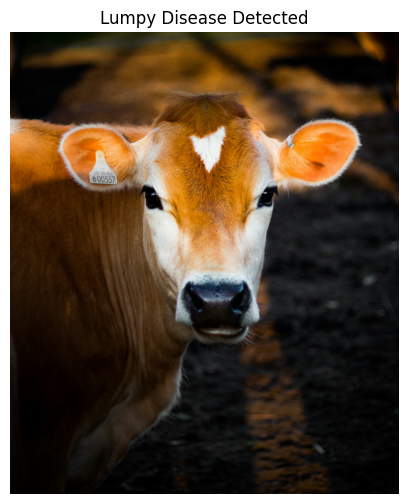

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("lumpy_detector.h5")

# Load image
img_path = "cow.jpg"
img = image.load_img(img_path, target_size=(224, 224))  
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)[0][0]  # Get scalar value

# Determine Label
label = "Lumpy Disease Detected" if prediction > 0.5 else "Normal Animal"

# Load original image with OpenCV
orig_img = cv2.imread(img_path)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Add label on image
font = cv2.FONT_HERSHEY_SIMPLEX

# Display the image with Matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(orig_img)
plt.axis("off")
plt.title(label)
plt.show()
